In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, Normalizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, roc_auc_score, confusion_matrix, classification_report

In [3]:
# Load the dataset
df = pd.read_csv(r"C:\Imp docs\Abhishek documents\16301843\Dentistry Dataset.csv")
df

,Sl No,Sample ID,Age,Gender,inter canine distance intraoral,intercanine distance casts,right canine width intraoral,right canine width casts,left canine width intraoral,left canine width casts,right canine index intra oral,right canine index casts,left canine index intraoral,left canine index casts
0,1,NaN,24,Female,25.06,25.05,6.08,6.08,6.09,6.10,0.242,0.242,0.242,0.241
1,2,NaN,22,Female,25.78,25.79,6.13,6.13,6.33,6.33,0.237,0.237,0.247,0.247
2,3,NaN,23,Female,23.83,23.83,5.91,5.96,6.28,6.28,0.248,0.248,0.264,0.264
3,4,NaN,20,Female,26.12,26.12,6.08,6.08,6.56,6.56,0.232,0.232,0.250,0.250
4,5,NaN,20,Female,26.36,26.41,6.09,6.09,6.50,6.50,0.231,0.231,0.246,0.246
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1095,1096,NaN,24,Male,24.29,24.29,6.58,6.58,6.60,6.60,0.271,0.271,0.272,0.272
1096,1097,NaN,22,Male,25.22,25.22,6.70,6.70,6.80,6.80,0.265,0.265,0.269,0.269
1097,1098,NaN,25,Male,24.24,24.24,6.60,6.60,6.61,6.61,0.272,0.272,0.272,0.272
1098,1099,NaN,21,Male,24.87,24.87,6.57,6.57,6.66,6.66,0.264,0.264,0.267,0.267


In [4]:
#Get head
df.head()

,Sl No,Sample ID,Age,Gender,inter canine distance intraoral,intercanine distance casts,right canine width intraoral,right canine width casts,left canine width intraoral,left canine width casts,right canine index intra oral,right canine index casts,left canine index intraoral,left canine index casts
0,1,NaN,24,Female,25.06,25.05,6.08,6.08,6.09,6.10,0.242,0.242,0.242,0.241
1,2,NaN,22,Female,25.78,25.79,6.13,6.13,6.33,6.33,0.237,0.237,0.247,0.247
2,3,NaN,23,Female,23.83,23.83,5.91,5.96,6.28,6.28,0.248,0.248,0.264,0.264
3,4,NaN,20,Female,26.12,26.12,6.08,6.08,6.56,6.56,0.232,0.232,0.250,0.250
4,5,NaN,20,Female,26.36,26.41,6.09,6.09,6.50,6.50,0.231,0.231,0.246,0.246


In [5]:
df.describe()

,Sl No,Sample ID,Age,inter canine distance intraoral,intercanine distance casts,right canine width intraoral,right canine width casts,left canine width intraoral,left canine width casts,right canine index intra oral,right canine index casts,left canine index intraoral,left canine index casts
count,1100.000000,0.0,1100.000000,1100.000000,1100.000000,1100.000000,1100.000000,1100.000000,1100.000000,1100.000000,1100.000000,1100.000000,1100.000000
mean,550.500000,NaN,21.625455,25.989009,25.880082,6.563000,6.564491,6.669627,6.675018,0.253122,0.252355,0.256453,0.256361
std,317.686953,NaN,2.085892,1.315292,1.862323,0.379035,0.377553,0.375841,0.377098,0.015344,0.012892,0.012355,0.012374
min,1.000000,NaN,18.000000,23.120000,6.540000,5.460000,5.460000,5.460000,5.460000,0.223000,0.223000,0.223000,0.223000
25%,275.750000,NaN,20.000000,25.000000,24.980000,6.290000,6.300000,6.400000,6.407500,0.242000,0.242000,0.247000,0.247000
50%,550.500000,NaN,22.000000,25.900000,25.900000,6.520000,6.520000,6.660000,6.680000,0.253000,0.253000,0.255000,0.255000
75%,825.250000,NaN,23.000000,26.992500,27.000000,6.802500,6.802500,6.910000,6.920000,0.262000,0.261250,0.264250,0.264000
max,1100.000000,NaN,25.000000,30.310000,30.310000,7.610000,7.600000,7.810000,7.810000,0.363000,0.302000,0.305000,0.304000


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1100 entries, 0 to 1099
Data columns (total 14 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Sl No                            1100 non-null   int64  
 1   Sample ID                        0 non-null      float64
 2   Age                              1100 non-null   int64  
 3   Gender                           1100 non-null   object 
 4   inter canine distance intraoral  1100 non-null   float64
 5   intercanine distance casts       1100 non-null   float64
 6   right canine width intraoral     1100 non-null   float64
 7   right canine width casts         1100 non-null   float64
 8   left canine width intraoral      1100 non-null   float64
 9   left canine width casts          1100 non-null   float64
 10  right canine index intra oral    1100 non-null   float64
 11  right canine index casts         1100 non-null   float64
 12  left canine index in

In [7]:
# to check null values
df.isna().sum()

Sl No                                 0
Sample ID                          1100
Age                                   0
Gender                                0
inter canine distance intraoral       0
intercanine distance casts            0
right canine width intraoral          0
right canine width casts              0
left canine width intraoral           0
left canine width casts               0
right canine index intra oral         0
right canine index casts              0
left canine index intraoral           0
left canine index casts               0
dtype: int64

In [8]:
# Drop unnecessary columns
df_cleaned = df.drop(columns=["Sl No", "Sample ID"], errors='ignore')

In [9]:
df_cleaned.head() #Check whether unnecessary column are droped

,Age,Gender,inter canine distance intraoral,intercanine distance casts,right canine width intraoral,right canine width casts,left canine width intraoral,left canine width casts,right canine index intra oral,right canine index casts,left canine index intraoral,left canine index casts
0,24,Female,25.06,25.05,6.08,6.08,6.09,6.10,0.242,0.242,0.242,0.241
1,22,Female,25.78,25.79,6.13,6.13,6.33,6.33,0.237,0.237,0.247,0.247
2,23,Female,23.83,23.83,5.91,5.96,6.28,6.28,0.248,0.248,0.264,0.264
3,20,Female,26.12,26.12,6.08,6.08,6.56,6.56,0.232,0.232,0.250,0.250
4,20,Female,26.36,26.41,6.09,6.09,6.50,6.50,0.231,0.231,0.246,0.246


In [10]:
# Encode categorical variable
label_encoder = LabelEncoder()
df_cleaned["Gender"] = label_encoder.fit_transform(df_cleaned["Gender"])

In [11]:
df_cleaned.head() #Encode succesfull

,Age,Gender,inter canine distance intraoral,intercanine distance casts,right canine width intraoral,right canine width casts,left canine width intraoral,left canine width casts,right canine index intra oral,right canine index casts,left canine index intraoral,left canine index casts
0,24,0,25.06,25.05,6.08,6.08,6.09,6.10,0.242,0.242,0.242,0.241
1,22,0,25.78,25.79,6.13,6.13,6.33,6.33,0.237,0.237,0.247,0.247
2,23,0,23.83,23.83,5.91,5.96,6.28,6.28,0.248,0.248,0.264,0.264
3,20,0,26.12,26.12,6.08,6.08,6.56,6.56,0.232,0.232,0.250,0.250
4,20,0,26.36,26.41,6.09,6.09,6.50,6.50,0.231,0.231,0.246,0.246


In [12]:
# Define independent and dependent variables
X = df_cleaned.drop(columns=["Gender"])
Y = df_cleaned["Gender"]

In [13]:
# Normalize the dataset
normalizer = Normalizer()
X_normalized = normalizer.fit_transform(X)

In [14]:
X_normalized.shape

(1100, 11)

In [15]:
# Split the dataset into training and testing sets
X_train, X_test, Y_train, Y_test = train_test_split(X_normalized, Y, test_size=0.2, random_state=42, stratify=Y)

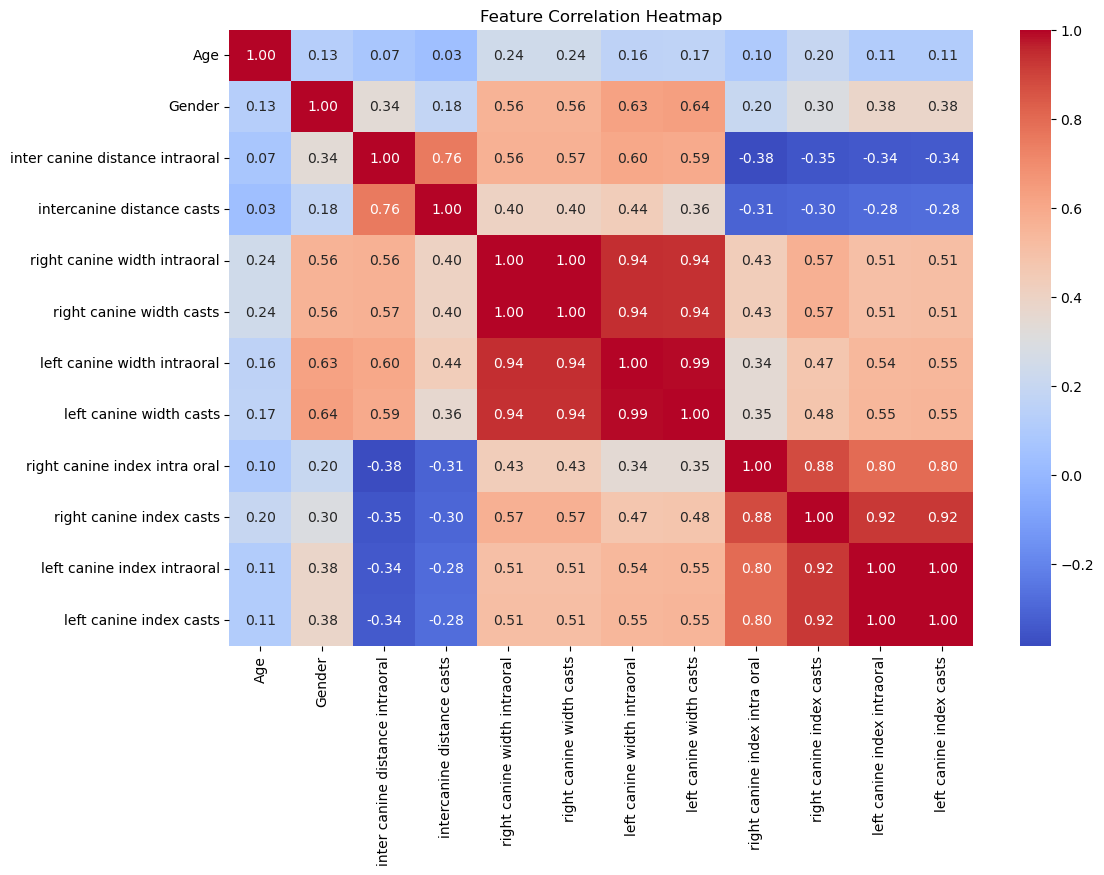

In [16]:
# Exploratory Data Analysis (EDA)
plt.figure(figsize=(12, 8))
sns.heatmap(df_cleaned.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Feature Correlation Heatmap")
plt.show()

In [17]:
# Initialize models
models = {
    "Logistic Regression": LogisticRegression(),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "Random Forest": RandomForestClassifier(random_state=42),
    "XGBoost": XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
}

In [18]:
# Train and evaluate models
results = {}
conf_matrices = {}
for name, model in models.items():
    model.fit(X_train, Y_train)
    Y_pred = model.predict(X_test)
    accuracy = accuracy_score(Y_test, Y_pred)
    auc = roc_auc_score(Y_test, Y_pred)
    results[name] = {"Accuracy": accuracy, "AUC": auc}
    conf_matrices[name] = confusion_matrix(Y_test, Y_pred)
    
    print(f"\n{name} Classification Report:\n", classification_report(Y_test, Y_pred))


Logistic Regression Classification Report:
               precision    recall  f1-score   support

           0       0.70      0.64      0.67       110
           1       0.67      0.73      0.70       110

    accuracy                           0.68       220
   macro avg       0.68      0.68      0.68       220
weighted avg       0.68      0.68      0.68       220


Decision Tree Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.84      0.86       110
           1       0.85      0.90      0.87       110

    accuracy                           0.87       220
   macro avg       0.87      0.87      0.87       220
weighted avg       0.87      0.87      0.87       220


Random Forest Classification Report:
               precision    recall  f1-score   support

           0       0.90      0.88      0.89       110
           1       0.88      0.90      0.89       110

    accuracy                           0.89       220
   ma

C:\Users\abhis\anaconda3\Lib\site-packages\xgboost\training.py:183: UserWarning: [17:19:59] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)



XGBoost Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.88      0.89       110
           1       0.88      0.89      0.89       110

    accuracy                           0.89       220
   macro avg       0.89      0.89      0.89       220
weighted avg       0.89      0.89      0.89       220



In [19]:
# Convert results to DataFrame
results_df = pd.DataFrame(results).T
print(results_df)

                     Accuracy       AUC
Logistic Regression  0.681818  0.681818
Decision Tree        0.868182  0.868182
Random Forest        0.890909  0.890909
XGBoost              0.886364  0.886364


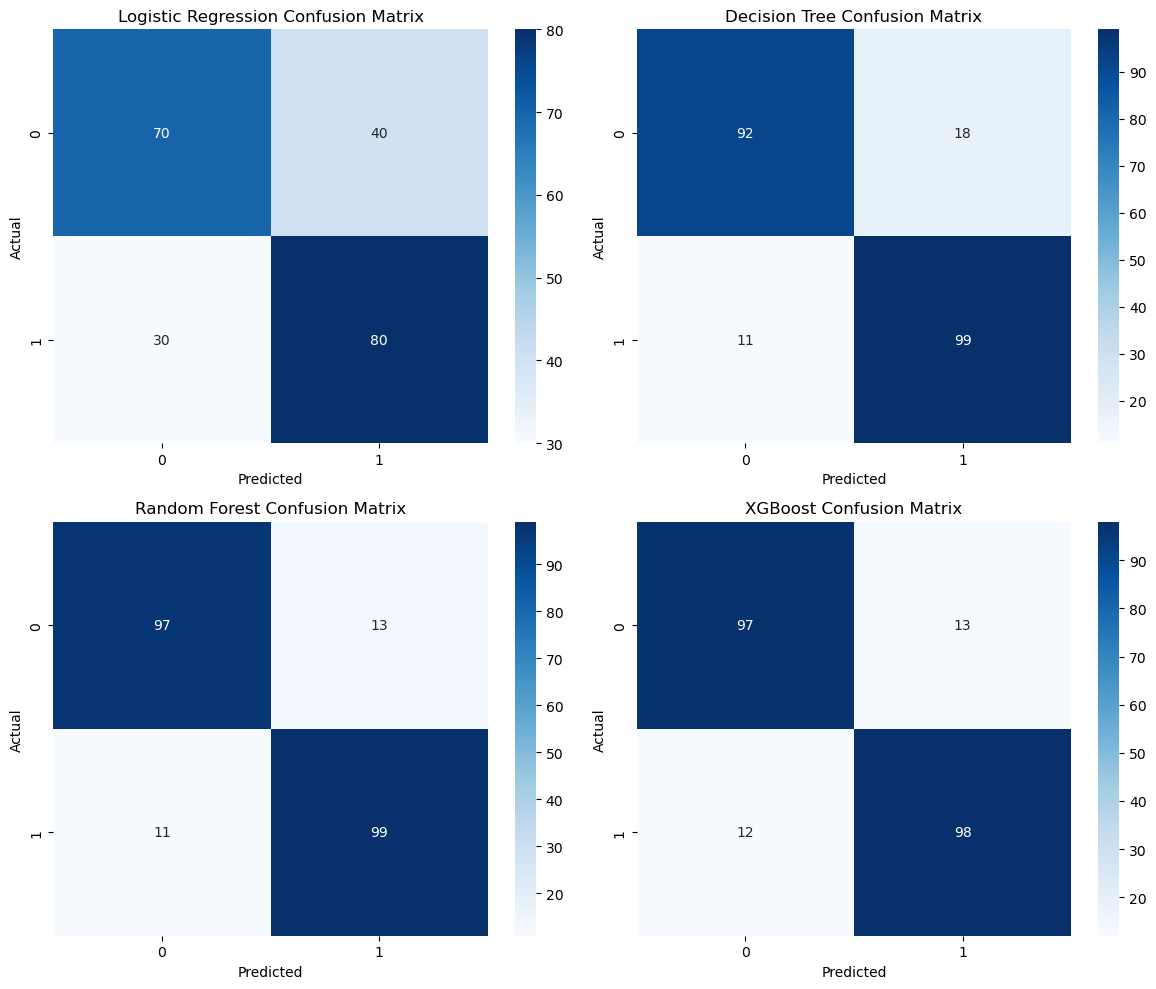

In [20]:
# Plot confusion matrices
fig, axes = plt.subplots(2, 2, figsize=(12, 10))
axes = axes.ravel()
for idx, (name, matrix) in enumerate(conf_matrices.items()):
    sns.heatmap(matrix, annot=True, fmt='d', cmap='Blues', ax=axes[idx])
    axes[idx].set_title(f"{name} Confusion Matrix")
    axes[idx].set_xlabel("Predicted")
    axes[idx].set_ylabel("Actual")
plt.tight_layout()
plt.show()

C:\Users\abhis\AppData\Local\Temp\ipykernel_19344\2404159674.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=importance_df["Importance"], y=importance_df["Feature"], palette="viridis")


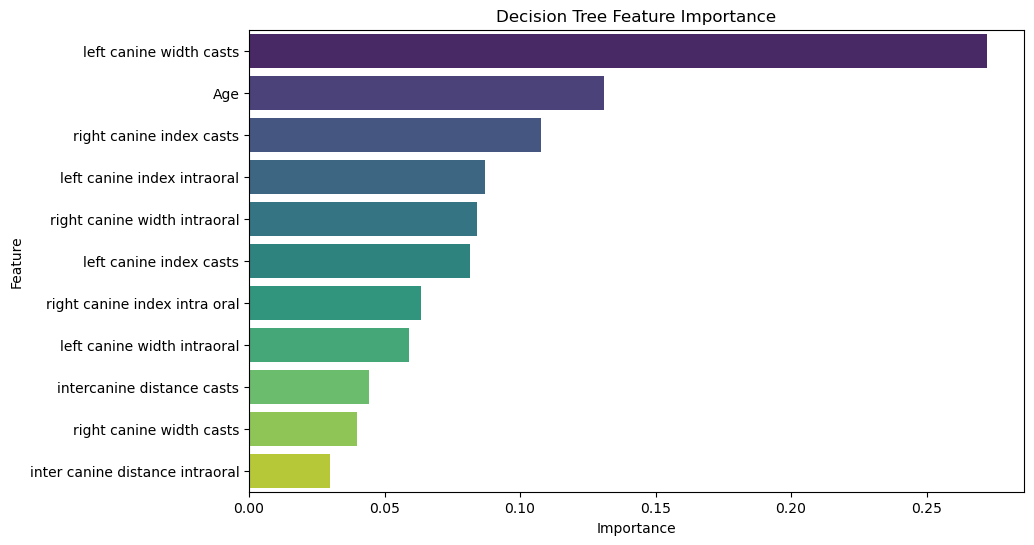

C:\Users\abhis\AppData\Local\Temp\ipykernel_19344\2404159674.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=importance_df["Importance"], y=importance_df["Feature"], palette="viridis")


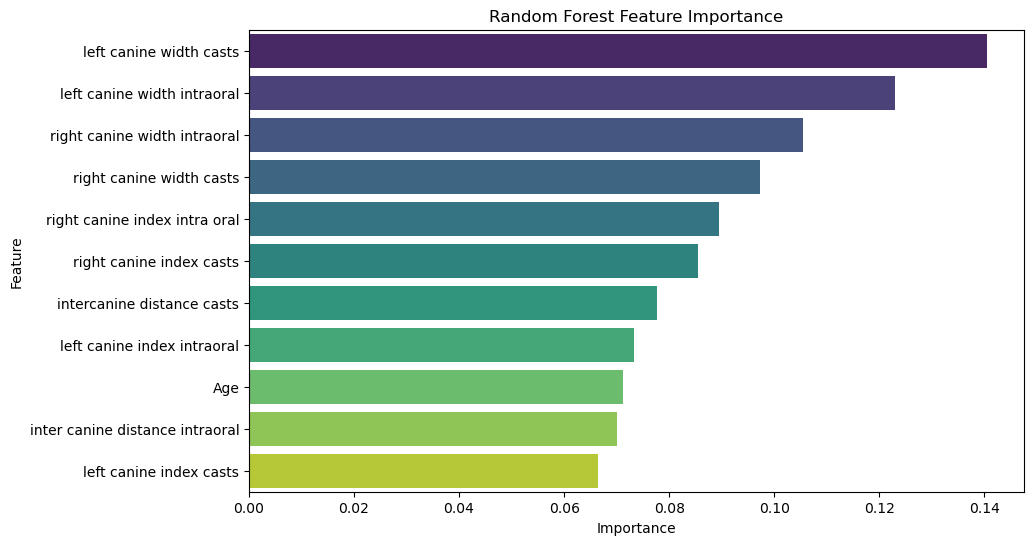

C:\Users\abhis\AppData\Local\Temp\ipykernel_19344\2404159674.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=importance_df["Importance"], y=importance_df["Feature"], palette="viridis")


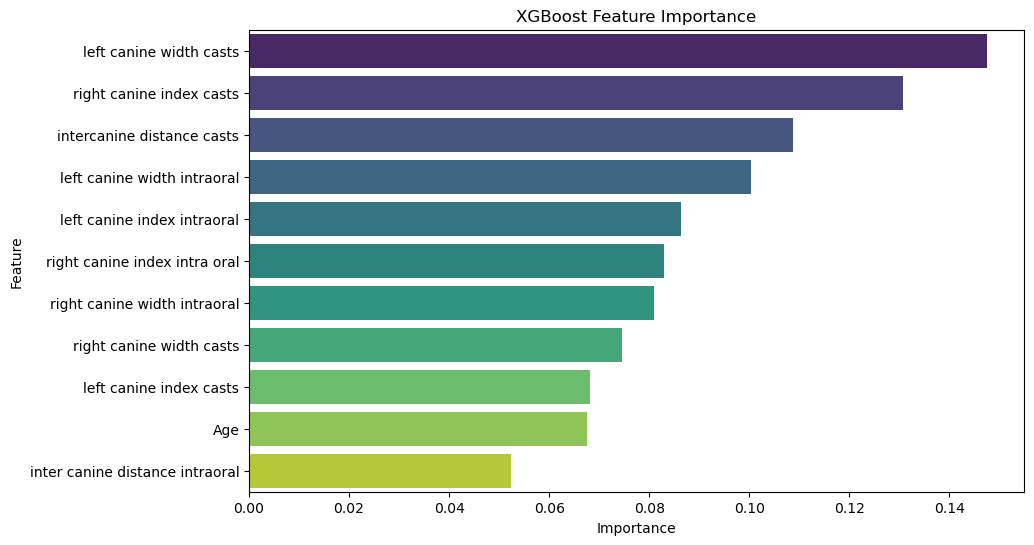

In [21]:
# Feature Importance for Tree-Based Models
tree_models = ["Decision Tree", "Random Forest", "XGBoost"]
for name in tree_models:
    model = models[name]
    importances = model.feature_importances_
    feature_names = df_cleaned.drop(columns=["Gender"]).columns
    importance_df = pd.DataFrame({"Feature": feature_names, "Importance": importances})
    importance_df = importance_df.sort_values(by="Importance", ascending=False)
    
    plt.figure(figsize=(10, 6))
    sns.barplot(x=importance_df["Importance"], y=importance_df["Feature"], palette="viridis")
    plt.title(f"{name} Feature Importance")
    plt.xlabel("Importance")
    plt.ylabel("Feature")
    plt.show()